<a href="https://colab.research.google.com/github/Mainabryan/sales-lead-conversion-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libarues

In [2]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer  # dataset
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.metrics import classification_report, accuracy_score  # for evaluating performance


## Load the datset

In [3]:
data =pd.read_csv('/content/sales_lead_data.csv')
data.head()

,lead_id,industry,lead_source,monthly_budget,employee_count,location,days_to_first_contact,interaction_score,previous_purchases,customer_lifetime_value,converted
0,1,Technology,Website,5000,50,Nairobi,3,85,1,High,Yes
1,2,Retail,Email Campaign,2000,20,Lagos,5,60,0,Low,No
2,3,Manufacturing,Referral,3000,100,London,2,75,2,Medium,Yes
3,4,Healthcare,Social Media,4000,30,Cape Town,7,45,0,Low,No
4,5,Finance,Paid Ads,6000,200,Mumbai,4,90,3,High,Yes


## EDA(Explatory data analysis)

In [4]:
data.tail()

,lead_id,industry,lead_source,monthly_budget,employee_count,location,days_to_first_contact,interaction_score,previous_purchases,customer_lifetime_value,converted
694,695,Finance,Social Media,7000,200,Mumbai,2,95,3,High,Yes
695,696,Technology,Referral,5200,60,Nairobi,7,75,0,Medium,No
696,697,Retail,Paid Ads,2200,10,Lagos,5,60,0,Low,No
697,698,Manufacturing,Website,3800,110,London,3,80,1,Medium,Yes
698,699,Healthcare,Email Campaign,2700,20,Cape Town,6,50,0,Low,No


In [5]:
data.isnull().sum()

,0
lead_id,0
industry,0
lead_source,0
monthly_budget,0
employee_count,0
location,0
days_to_first_contact,0
interaction_score,0
previous_purchases,0
customer_lifetime_value,0


Understand structures

In [6]:
data.columns

Index(['lead_id', 'industry', 'lead_source', 'monthly_budget',
       'employee_count', 'location', 'days_to_first_contact',
       'interaction_score', 'previous_purchases', 'customer_lifetime_value',
       'converted'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   lead_id                  699 non-null    int64 
 1   industry                 699 non-null    object
 2   lead_source              699 non-null    object
 3   monthly_budget           699 non-null    int64 
 4   employee_count           699 non-null    int64 
 5   location                 699 non-null    object
 6   days_to_first_contact    699 non-null    int64 
 7   interaction_score        699 non-null    int64 
 8   previous_purchases       699 non-null    int64 
 9   customer_lifetime_value  699 non-null    object
 10  converted                699 non-null    object
dtypes: int64(6), object(5)
memory usage: 60.2+ KB


In [8]:
data.shape

(699, 11)

In [9]:
data.dtypes

,0
lead_id,int64
industry,object
lead_source,object
monthly_budget,int64
employee_count,int64
location,object
days_to_first_contact,int64
interaction_score,int64
previous_purchases,int64
customer_lifetime_value,object


In [10]:
data.describe(include='all')

,lead_id,industry,lead_source,monthly_budget,employee_count,location,days_to_first_contact,interaction_score,previous_purchases,customer_lifetime_value,converted
count,699.000000,699,699,699.000000,699.000000,699,699.000000,699.000000,699.000000,699,699
unique,NaN,5,5,NaN,NaN,5,NaN,NaN,NaN,3,2
top,NaN,Technology,Website,NaN,NaN,Nairobi,NaN,NaN,NaN,Low,No
freq,NaN,140,229,NaN,NaN,140,NaN,NaN,NaN,280,419
mean,350.000000,NaN,NaN,4098.426323,76.423462,NaN,4.545064,70.393419,0.699571,NaN,NaN
std,201.928205,NaN,NaN,1778.560745,59.391864,NaN,1.877071,15.303370,1.003511,NaN,NaN
min,1.000000,NaN,NaN,1500.000000,10.000000,NaN,2.000000,40.000000,0.000000,NaN,NaN
25%,175.500000,NaN,NaN,2600.000000,20.000000,NaN,3.000000,55.000000,0.000000,NaN,NaN
50%,350.000000,NaN,NaN,3700.000000,65.000000,NaN,4.000000,70.000000,0.000000,NaN,NaN
75%,524.500000,NaN,NaN,5100.000000,110.000000,NaN,6.000000,82.500000,1.000000,NaN,NaN


##Data Cleaning and preprocessing

DATA CLEANING

In [11]:
# Check for missing values
# View total missing values in each column
data.isnull().sum()



,0
lead_id,0
industry,0
lead_source,0
monthly_budget,0
employee_count,0
location,0
days_to_first_contact,0
interaction_score,0
previous_purchases,0
customer_lifetime_value,0


Check duplicates

In [12]:
data.duplicated().sum()  # See how many duplicate rows exist

np.int64(0)

Check the ouliers

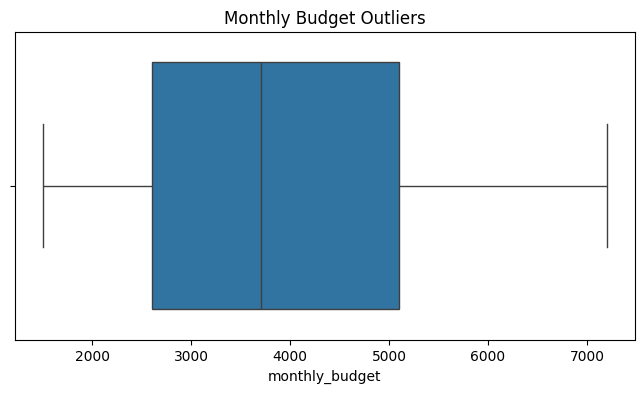

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='monthly_budget')
plt.title("Monthly Budget Outliers")
plt.show()

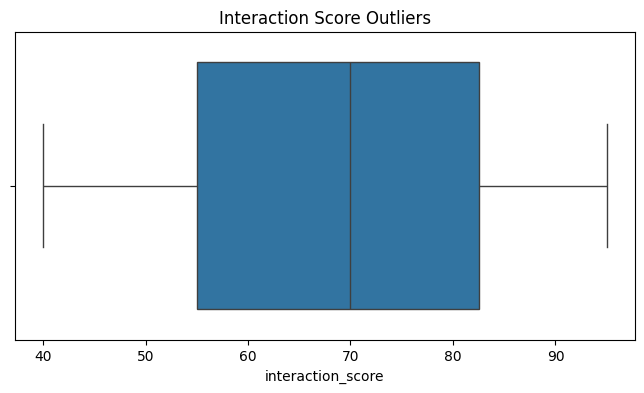

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='interaction_score')
plt.title("Interaction Score Outliers")
plt.show()

## DATA PREPROCESSING

# DROP IRRELEVAN COLUMNS

In [15]:
## Dont help with prediction
data.drop(columns=['lead_id'], inplace=True)


#Encoding